# Henrylab Coding Test

All code should be shown in this jupyter notebook. 

### By: Vishal Kandagatla

In [18]:
import nilearn

In [19]:
import nipype

### Instructions###

1. Download the anatomical images of 5 subjects from the [ABIDE dataset](http://preprocessed-connectomes-project.org/abide/download.html). 
    * For example, one URL to downnload is: http://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE_Initiative/RawData/Pitt/0050008/session_1/anat_1/mprage.nii.gz , where the subject id is 0050008
    
2. Set up an anaconda python environment: https://www.continuum.io/downloads and install the nipype and nilearn packages
    ```bash 
conda create --name env_name python=3 anaconda
conda config --add channels conda-forge
conda install -y nipype
conda install -y nilearn
```

3. Download and install [FSL](https://fsl.fmrib.ox.ac.uk/fsldownloads/)

4. Read the tutorial on [nipype interfaces](https://miykael.github.io/nipype_tutorial/notebooks/basic_interfaces.html) and do the following:
    * For each subject, create a brain mask using FSL's BET through nipype interfaces. 
    * Create images for each brain mask overlaid on the original anatomica image using nilearn's plotting tools (Hint: use [plot_roi](http://nilearn.github.io/auto_examples/01_plotting/plot_demo_plotting.html#plotting-rois-here-the-mask-with-function-plot-roi) ) in this noteboook
    
5. Read the tutorial on [nipype workflows](https://miykael.github.io/nipype_tutorial/notebooks/basic_workflow.html) and do the following:
    * Create a workflow that runs BET on 1 subject, and then runs FSL's [FAST](http://nipype.readthedocs.io/en/latest/interfaces/generated/nipype.interfaces.fsl.preprocess.html#fast) to segment gray and white matter, CSF. The masked brain (BET output) is what FAST should use to segment.
    * Create and display an image of the workflow using `workflow.write_graph()`
    
6. Read the tutorial on the [DataGrabber](https://miykael.github.io/nipype_tutorial/notebooks/basic_data_input.html) and [DataSink](https://miykael.github.io/nipype_tutorial/notebooks/basic_data_output.html) nodes and:
    * define a datagrabber node that takes in a subject_id field and returns the path to the T1 image. Connect the output of the datagrabber to the input of the BET node 
    * define a datasink node that saves the output probability images of FAST and the brain-mask from BET.
    * Create images of the probability maps from FAST using nilearn's plotting tools (Hint: use [plot_stat_map](http://nilearn.github.io/auto_examples/01_plotting/plot_demo_plotting.html#plotting-statistical-maps-with-function-plot-stat-map))
    * display the workflow graph
    
7. Look at documentation for the [IdentityInterface](https://miykael.github.io/nipype_tutorial/notebooks/basic_data_input.html) and:
    * Create an identity node that takes in a subject_id
    * connect the subject_id output of the identity node to the subject_id input of the datagrabber
    * display the worflow graph
    
8. Read the second tutorial on [nipype workflows](https://miykael.github.io/nipype_tutorial/notebooks/basic_iteration.html) on iterables and iterfields. 
    * Define an iterable on the IdentityInterface's subject_id, as a list of all 5 subject ids
    * Run the workflow on all 5 subjects
    
9. Read the documentation on [Function Nodes](https://miykael.github.io/nipype_tutorial/notebooks/basic_function_interface.html)
    * Write a function that takes in a probability image and base T1 image and saves a .png file. The function should return the path to the .png image. 
    * Wrap your visualization function in a Function Node
    * Connect the Function node to the outputs of the DataGrabber (for the base T1 image) and the output of FAST (for the probability image). 
    * Connect the output of the function node to the DataSink Node
    * Display the graph
    * Run the workflow


## 1. Download the anatomical images of 5 subjects from the ABIDE dataset

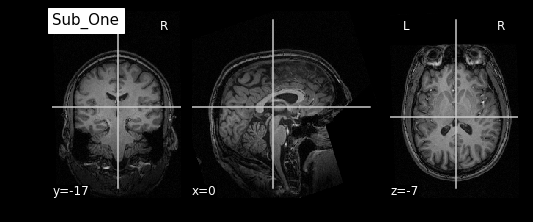

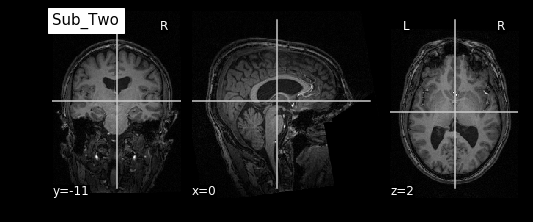

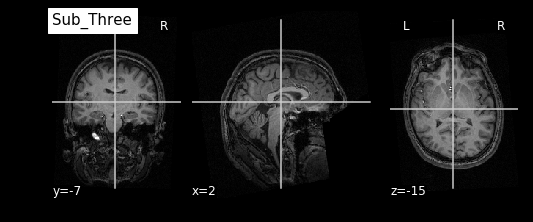

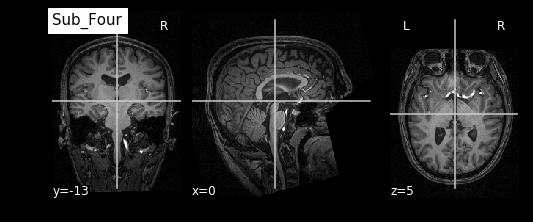

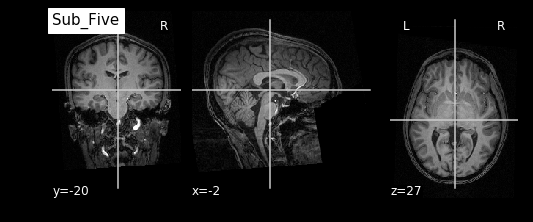

In [20]:
# Plotting anatomical images of 5 subjects
from nilearn.plotting import plot_anat
%matplotlib inline
plot_anat('/home/vishal/Downloads/sub_one.nii',display_mode='ortho',title='Sub_One', dim=-1);
plot_anat('/home/vishal/Downloads/sub_two.nii',display_mode='ortho',title='Sub_Two', dim=-1);
plot_anat('/home/vishal/Downloads/sub_three.nii',display_mode='ortho',title='Sub_Three', dim=-1);
plot_anat('/home/vishal/Downloads/sub_four.nii',display_mode='ortho',title='Sub_Four', dim=-1);
plot_anat('/home/vishal/Downloads/sub_five.nii',display_mode='ortho',title='Sub_Five', dim=-1);

## 4. Nipype interfaces

#### 4.1 Brain Masking from FSL's BET

In [21]:
from nipype.interfaces.fsl import BET

In [22]:
# Creating Brain Mask for each subject
#Subject one
skullstrip = BET(in_file="/home/vishal/Downloads/sub_one.nii",
                 out_file="/home/vishal/Downloads/sub_one_brain.nii",
                 mask=True)
res = skullstrip.run()
#Subject two
skullstrip = BET(in_file="/home/vishal/Downloads/sub_two.nii",
                 out_file="/home/vishal/Downloads/sub_two_brain.nii",
                 mask=True)
res = skullstrip.run()
#Subject three
skullstrip = BET(in_file="/home/vishal/Downloads/sub_three.nii",
                 out_file="/home/vishal/Downloads/sub_three_brain.nii",
                 mask=True)
res = skullstrip.run()
#Subject four
skullstrip = BET(in_file="/home/vishal/Downloads/sub_four.nii",
                 out_file="/home/vishal/Downloads/sub_four_brain.nii",
                 mask=True)
res = skullstrip.run()
#Subject five
skullstrip = BET(in_file="/home/vishal/Downloads/sub_five.nii",
                 out_file="/home/vishal/Downloads/sub_five_brain.nii",
                 mask=True)
res = skullstrip.run()

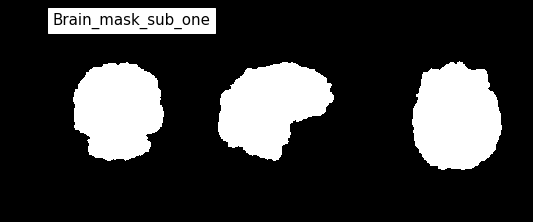

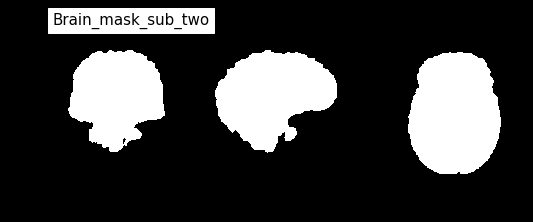

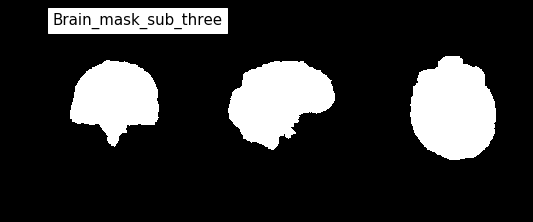

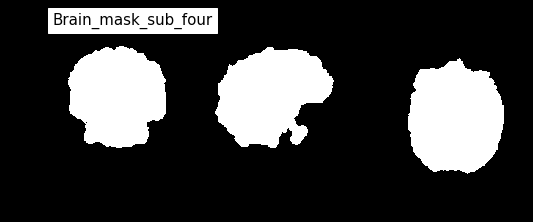

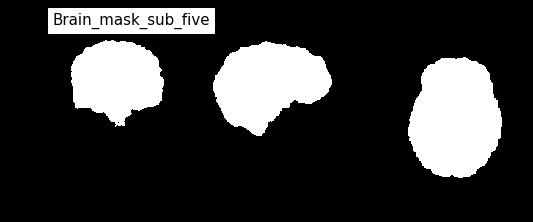

In [23]:
#Plotting Brain mask for each subject
#subject one
from nilearn.plotting import plot_anat
%matplotlib inline
plot_anat('/home/vishal/Downloads/sub_one_brain_mask.nii', title='Brain_mask_sub_one',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
#subject two
plot_anat('/home/vishal/Downloads/sub_two_brain_mask.nii', title='Brain_mask_sub_two',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
#subject three
plot_anat('/home/vishal/Downloads/sub_three_brain_mask.nii', title='Brain_mask_sub_three',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
#subject four
plot_anat('/home/vishal/Downloads/sub_four_brain_mask.nii', title='Brain_mask_sub_four',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
#subject five
plot_anat('/home/vishal/Downloads/sub_five_brain_mask.nii', title='Brain_mask_sub_five',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)

#### 4.2 Images of brain masks using nilearn

In [24]:
%pylab inline
from nilearn.plotting import plot_roi

Populating the interactive namespace from numpy and matplotlib


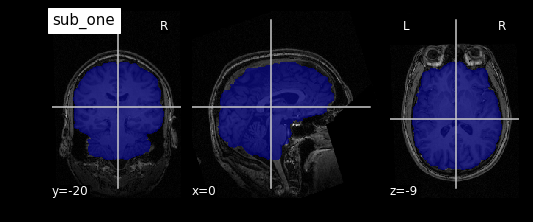

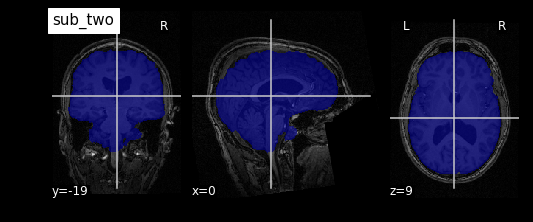

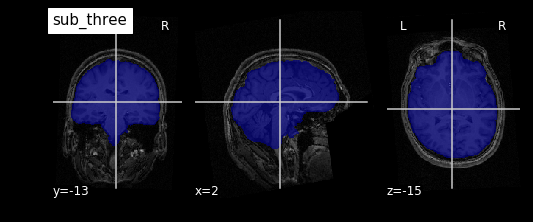

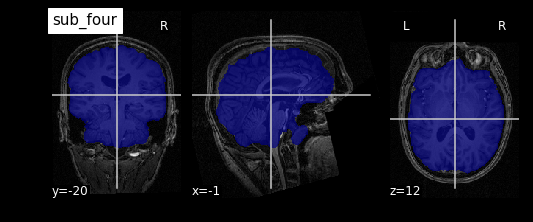

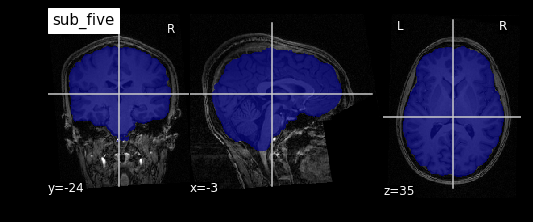

In [25]:
# Plotting each brain mask overlaid on the original anatomica image 
# Subject one
plot_roi("/home/vishal/Downloads/sub_one_brain_mask.nii", bg_img="/home/vishal/Downloads/sub_one.nii",dim=-1,
                  title="sub_one")
# Subject two
plot_roi("/home/vishal/Downloads/sub_two_brain_mask.nii", bg_img="/home/vishal/Downloads/sub_two.nii",dim=-1,
                  title="sub_two")
# Subject three
plot_roi("/home/vishal/Downloads/sub_three_brain_mask.nii", bg_img="/home/vishal/Downloads/sub_three.nii",dim=-1,
                  title="sub_three")
# Subject four
plot_roi("/home/vishal/Downloads/sub_four_brain_mask.nii", bg_img="/home/vishal/Downloads/sub_four.nii",dim=-1,
                  title="sub_four")
# Subject five
plot_roi("/home/vishal/Downloads/sub_five_brain_mask.nii", bg_img="/home/vishal/Downloads/sub_five.nii",dim=-1,
                  title="sub_five")

## 5. Nipype Workflows

In [26]:
from nipype import Node, Workflow
from nipype.interfaces.fsl import BET, FAST
from os.path import abspath

In [27]:
#input file
input_file = abspath("/home/vishal/Downloads/sub_five.nii")
output_file= abspath("/home/vishal/Downloads/sub_five_brain_mask.nii")

In [30]:
# Creating Brain mask using BET
Brain_mask = Node(BET(in_file=input_file, mask=True), name="Brain_mask")

In [33]:
#Segmentation of brain mask using FAST
FAST_seg = Node(FAST(in_files=output_file,segments=True),name = 'FAST_segmentation')

In [34]:
#defining workflow
wf = Workflow(name="smoothflow", base_dir="/home/vishal/Downloads")

In [35]:
#connecting nodes
wf.connect(Brain_mask, "out_file", FAST_seg,"in_files")

In [36]:
# Specify the base directory for the working directory
wf.base_dir = "/home/vishal/Downloads"

# Execute the workflow
wf.run()

180802-03:14:01,616 nipype.workflow INFO:
	 Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']
180802-03:14:01,639 nipype.workflow INFO:
	 Running serially.
180802-03:14:01,643 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.Brain_mask" in "/home/vishal/Downloads/smoothflow/Brain_mask".
180802-03:14:01,651 nipype.workflow INFO:
	 [Node] Running "Brain_mask" ("nipype.interfaces.fsl.preprocess.BET"), a CommandLine Interface with command:
bet /home/vishal/Downloads/sub_five.nii /home/vishal/Downloads/smoothflow/Brain_mask/sub_five_brain.nii.gz -m
180802-03:14:07,538 nipype.workflow INFO:
	 [Node] Finished "smoothflow.Brain_mask".
180802-03:14:07,541 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.FAST_segmentation" in "/home/vishal/Downloads/smoothflow/FAST_segmentation".
180802-03:14:07,553 nipype.workflow INFO:
	 [Node] Running "FAST_segmentation" ("nipype.interfaces.fsl.preprocess.FAST"), a CommandLine Interface with command:
fast -g -S 1 /home/vi

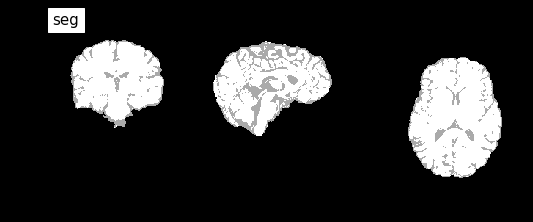

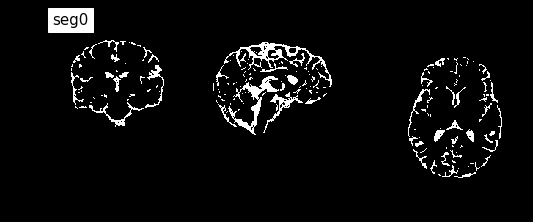

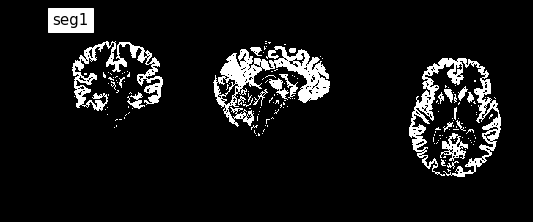

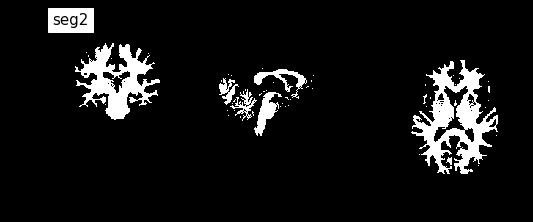

In [47]:
plot_anat('/home/vishal/Downloads/smoothflow/FAST_segmentation/sub_five_brain_seg.nii', title='seg',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plot_anat('/home/vishal/Downloads/smoothflow/FAST_segmentation/sub_five_brain_seg_0.nii', title='seg0',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plot_anat('/home/vishal/Downloads/smoothflow/FAST_segmentation/sub_five_brain_seg_1.nii', title='seg1',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)
plot_anat('/home/vishal/Downloads/smoothflow/FAST_segmentation/sub_five_brain_seg_2.nii', title='seg2',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False)

180802-04:07:48,5 nipype.workflow INFO:
	 Generated workflow graph: /home/vishal/Downloads/smoothflow/graph.png (graph2use=hierarchical, simple_form=True).


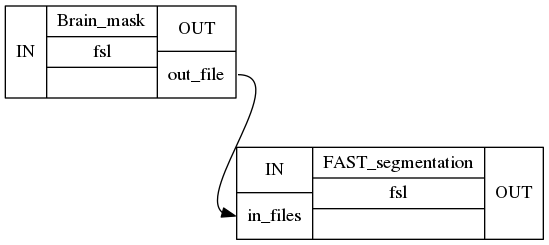

In [54]:
# Workflow image
wf.write_graph("graph.dot")
from IPython.display import Image
Image(filename="/home/vishal/Downloads/smoothflow/graph_detailed.png")

180802-04:08:37,905 nipype.workflow INFO:
	 Generated workflow graph: /home/vishal/Downloads/smoothflow/graph_detailed.png (graph2use=hierarchical, simple_form=True).


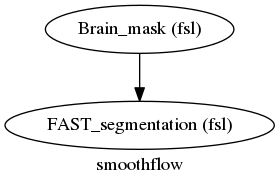

In [55]:
wf.write_graph("graph_detailed.dot")
from IPython.display import Image
Image(filename="/home/vishal/Downloads/smoothflow/graph_detailed.png")

## 6. DataGrabber and DataSink

## 7. IdentityInterfaces

## 8. Iterables and Iterfields

## 9. Function Nodes